### Python Libraries

In [1]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Project Goal: 
### To find out the correlation between a graduate's pay and their productivity and build a prediction model to predict graduates' pay

## Data Preparation:

### Wages (Predictand):

In [2]:
# Obtaining the data for wages
wages_df = pd.read_csv("wages.csv")
wages_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Theme: Economy & Prices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Subject: Labour, Employment, Wages and Product...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Wages and Income from Work,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Table Title: Gross Monthly Income From Work (I...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Data last updated: 01/12/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Source: MINISTRY OF MANPOWER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dollar
9,Data Series,2022,2021.0,2020.0,2019.0,2018.0,2017.0,2016.0,2015.0,2014.0,...,2007.0,2006.0,2004.0,2003.0,2002.0,2001.0,1999.0,1998.0,1997.0,1996


### Here we are only interested in rows 9 to 11

In [3]:
wages_df = pd.DataFrame(wages_df.iloc[9:11])
wages_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
9,Data Series,2022,2021.0,2020.0,2019.0,2018.0,2017.0,2016.0,2015.0,2014.0,...,2007.0,2006.0,2004.0,2003.0,2002.0,2001.0,1999.0,1998.0,1997.0,1996
10,Median (50th Percentile),5070,4680.0,4534.0,4563.0,4437.0,4232.0,4056.0,3949.0,3770.0,...,2543.0,2449.0,2326.0,2410.0,2380.0,2387.0,2026.0,2240.0,2078.0,1950


In [6]:
# Swapping x and y axes
wages_df = wages_df.transpose()

# Dropping a redundant column "Unnamed"
wages_df = wages_df.reset_index(drop=True)

# Renaming the columns for better readability
wages_df = wages_df.set_axis(['Year', 'Median Monthly Income'], axis='columns')

# Dropping the duplicate column names
wages_df = wages_df.drop(index=0)

# Standardising all data values into integers
wages_df = wages_df.astype(int)
wages_df = wages_df.sort_values(by='Year')

# Sanity check
print(wages_df)

    Year  Median Monthly Income
25  1996                   1950
24  1997                   2078
23  1998                   2240
22  1999                   2026
21  2001                   2387
20  2002                   2380
19  2003                   2410
18  2004                   2326
17  2006                   2449
16  2007                   2543
15  2008                   2897
14  2009                   2927
13  2010                   3000
12  2011                   3249
11  2012                   3480
10  2013                   3705
9   2014                   3770
8   2015                   3949
7   2016                   4056
6   2017                   4232
5   2018                   4437
4   2019                   4563
3   2020                   4534
2   2021                   4680
1   2022                   5070


### Productivity (Predictor):

In [7]:
# Obtaining the data for productivity
productivity_df = pd.read_csv("productivity.csv")

# Focusing on the actual data in the file
productivity_df = pd.DataFrame(productivity_df.iloc[9:11])

# Making the data labels into column names instead of row names
productivity_df = productivity_df.transpose()

# Dropping a redundant column "Unnamed"
productivity_df = productivity_df.reset_index()

# Renaming the columns for better readability
productivity_df = productivity_df.set_axis(['Annual', 'Quarterly', 'Composite Leading Index'], axis='columns')

# Dropping the duplicate column names
productivity_df = productivity_df.drop(index=0)

# Sanity check
print(productivity_df)

           Annual Quarterly Composite Leading Index
1      Unnamed: 1  2022 4Q                    106.2
2      Unnamed: 2  2022 3Q                    110.5
3      Unnamed: 3  2022 2Q                    111.9
4      Unnamed: 4  2022 1Q                    111.6
5      Unnamed: 5  2021 4Q                    112.3
..            ...       ...                     ...
176  Unnamed: 176  1979 1Q                     28.8
177  Unnamed: 177  1978 4Q                     27.6
178  Unnamed: 178  1978 3Q                     28.3
179  Unnamed: 179  1978 2Q                     27.5
180  Unnamed: 180  1978 1Q                     26.6

[180 rows x 3 columns]


In [9]:
# Inputting the years into the empty Annual Column
for n in range(1, len(productivity_df), 4):
    productivity_df['Annual'][n-1:n+3] = int(2022 - (n-1)/4)

# Prepping the Composite Leading Index Column as float values for mean calculation
productivity_df['Composite Leading Index'] = productivity_df['Composite Leading Index'].astype(float)

# Sanity check
print(productivity_df)

    Annual Quarterly  Composite Leading Index
1     2022  2022 4Q                     106.2
2     2022  2022 3Q                     110.5
3     2022  2022 2Q                     111.9
4     2022  2022 1Q                     111.6
5     2021  2021 4Q                     112.3
..     ...       ...                      ...
176   1979  1979 1Q                      28.8
177   1978  1978 4Q                      27.6
178   1978  1978 3Q                      28.3
179   1978  1978 2Q                      27.5
180   1978  1978 1Q                      26.6

[180 rows x 3 columns]


### Creating a new DataFrame to hold the mean values of productivity

In [10]:
prod_annual = productivity_df.groupby('Annual')
prod_annual = prod_annual.size().to_frame(name='counts').join(prod_annual.agg({'Composite Leading Index': 'mean'}).rename(columns={'Composite Leading Index': 'Annual Composite Leading Index'}))
prod_annual = prod_annual.reset_index()
prod_annual = pd.DataFrame(prod_annual)

# Renaming the columns and dropping the redundant Count Column for better readability
prod_annual = prod_annual.rename(columns={"Annual": "Year"})
prod_annual = prod_annual.drop(columns=['counts'])

# Sanity Check
print(prod_annual)

    Year  Annual Composite Leading Index
0   1978                          27.500
1   1979                          28.725
2   1980                          30.825
3   1981                          33.975
4   1982                          33.200
5   1983                          38.225
6   1984                          38.900
7   1985                          35.775
8   1986                          38.675
9   1987                          44.325
10  1988                          46.725
11  1989                          50.075
12  1990                          52.650
13  1991                          54.925
14  1992                          57.300
15  1993                          60.625
16  1994                          64.075
17  1995                          65.375
18  1996                          66.225
19  1997                          68.075
20  1998                          63.450
21  1999                          71.075
22  2000                          72.800
23  2001        

### Graduates:

In [11]:
# Obtaining the data for graduates
graduates_df = pd.read_csv("graduates.csv")

# Focusing only on the rows of data we are interested in
graduates_df = pd.DataFrame(graduates_df.iloc[9:42])

# Making the data labels into column names instead of row names
graduates_df = graduates_df.transpose()

# Dropping a redundant column "Unnamed"
graduates_df = graduates_df.reset_index(drop=True)

# Renaming the columns for better readability and dropping duplicate names
graduates_df = graduates_df.set_axis(graduates_df.iloc[0], axis='columns')
graduates_df = graduates_df.rename(columns={"Data Series": "Year"})
graduates_df = graduates_df.drop(index=0)
print(graduates_df)

0     Year    Males   Males: Education   Males: Applied Arts  \
1   2021.0  10075.0               46.0                 180.0   
2   2020.0   9880.0               58.0                 163.0   
3   2019.0   9429.0               54.0                 186.0   
4   2018.0   9404.0               73.0                 189.0   
5   2017.0   8963.0               65.0                 175.0   
6   2016.0   7703.0               79.0                 173.0   
7   2015.0   7872.0               99.0                 187.0   
8   2014.0   7756.0              124.0                 165.0   
9   2013.0   7724.0              167.0                 138.0   
10  2012.0   6778.0              116.0                 108.0   
11  2011.0   6428.0              103.0                  84.0   
12  2010.0   6496.0               67.0                  84.0   
13  2009.0   6004.0               67.0                  47.0   
14  2008.0   5736.0               53.0                  31.0   
15  2007.0   5823.0               73.0  

In [12]:
# Filling the missing data with 0
graduates_df = graduates_df.replace('na', 0)

# Standardising all values to be of integer values
graduates_df = graduates_df.astype(int)
graduates_df.sort_values(by='Year')
# Sanity check
print(graduates_df)

0   Year  Males    Males: Education    Males: Applied Arts  \
1   2021  10075                  46                    180   
2   2020   9880                  58                    163   
3   2019   9429                  54                    186   
4   2018   9404                  73                    189   
5   2017   8963                  65                    175   
6   2016   7703                  79                    173   
7   2015   7872                  99                    187   
8   2014   7756                 124                    165   
9   2013   7724                 167                    138   
10  2012   6778                 116                    108   
11  2011   6428                 103                     84   
12  2010   6496                  67                     84   
13  2009   6004                  67                     47   
14  2008   5736                  53                     31   
15  2007   5823                  73                     28   
16  2006

## Exploratory data analysis

In [13]:
# First, we need to merge all 3 data sets into one for convenience
# It also conveniently picks the subset of years that exist on all 3 data sets
data = pd.merge(prod_annual, wages_df, on='Year')
data = pd.merge(graduates_df, data, on='Year')
print(data)

# Labelling the relevant variables for future analysis
productivity = data['Annual Composite Leading Index']
wages = data['Median Monthly Income']
year = data['Year']
male_graduates = data['Males']
female_graduates = data['Females']

    Year  Males    Males: Education    Males: Applied Arts  \
0   2021  10075                  46                    180   
1   2020   9880                  58                    163   
2   2019   9429                  54                    186   
3   2018   9404                  73                    189   
4   2017   8963                  65                    175   
5   2016   7703                  79                    173   
6   2015   7872                  99                    187   
7   2014   7756                 124                    165   
8   2013   7724                 167                    138   
9   2012   6778                 116                    108   
10  2011   6428                 103                     84   
11  2010   6496                  67                     84   
12  2009   6004                  67                     47   
13  2008   5736                  53                     31   
14  2007   5823                  73                     28   
15  2006

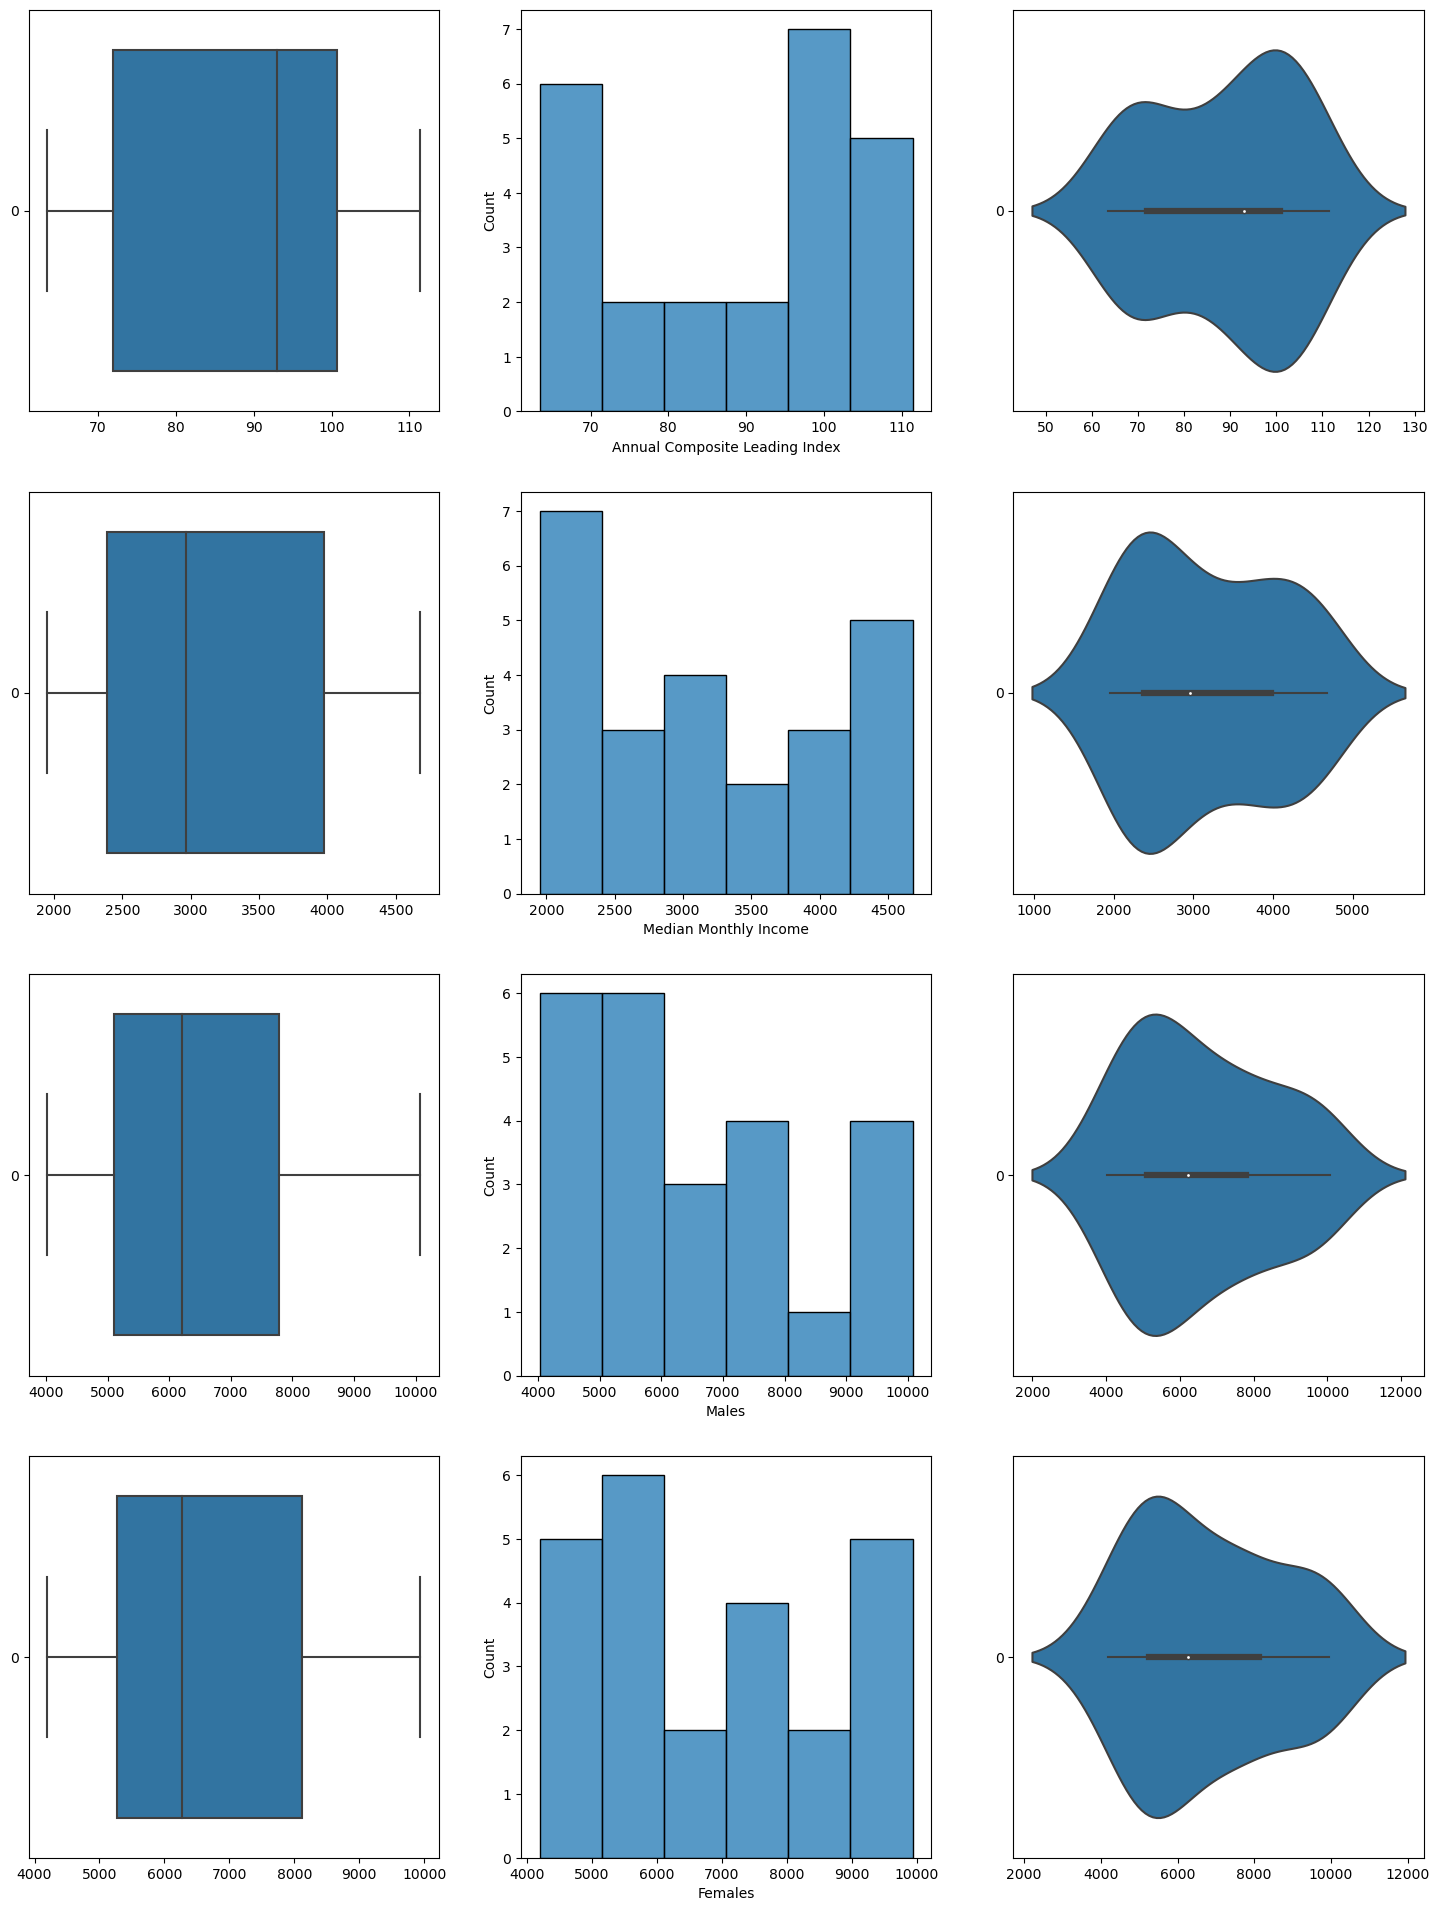

In [22]:
f, axes = plt.subplots(4, 3, figsize=(18, 24))

numeric_data = [productivity, wages, male_graduates, female_graduates]

count = 0
for var in numeric_data:
    sns.boxplot(data = var, orient = "h", ax = axes[count,0])
    sns.histplot(data = var, ax = axes[count,1])
    sns.violinplot(data = var, orient = "h", ax = axes[count,2])
    count += 1

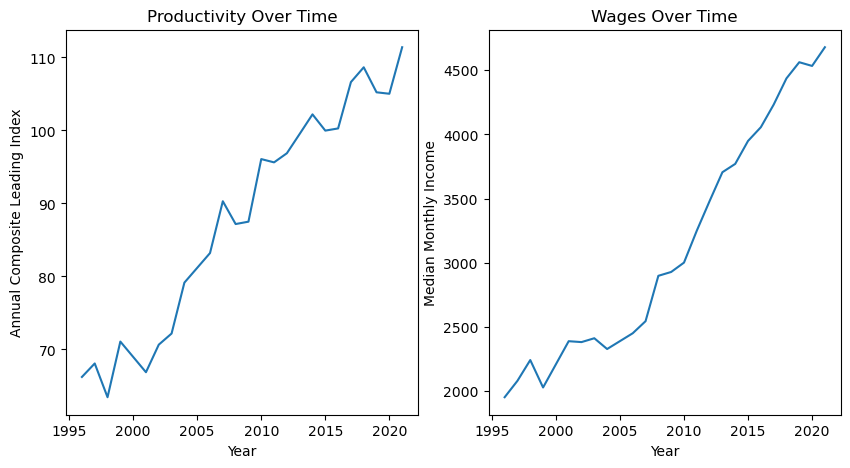

In [15]:
# Let's find what is the relationship between wages and productivity

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first scatterplot in the first subplot
sns.lineplot(y=productivity, x=year, ax=axs[0])
axs[0].set_title('Productivity Over Time')

# Plot the second scatterplot in the second subplot
sns.lineplot(y=wages, x=year, ax=axs[1])
axs[1].set_title('Wages Over Time')
plt.show()

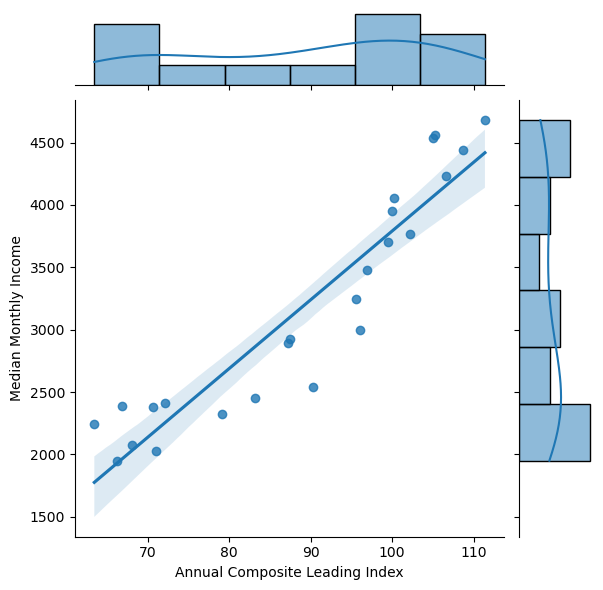

In [16]:
# Predictor: productivity, Predictand: wages
sns.jointplot(x= productivity, y= wages, kind="reg")
plt.show()

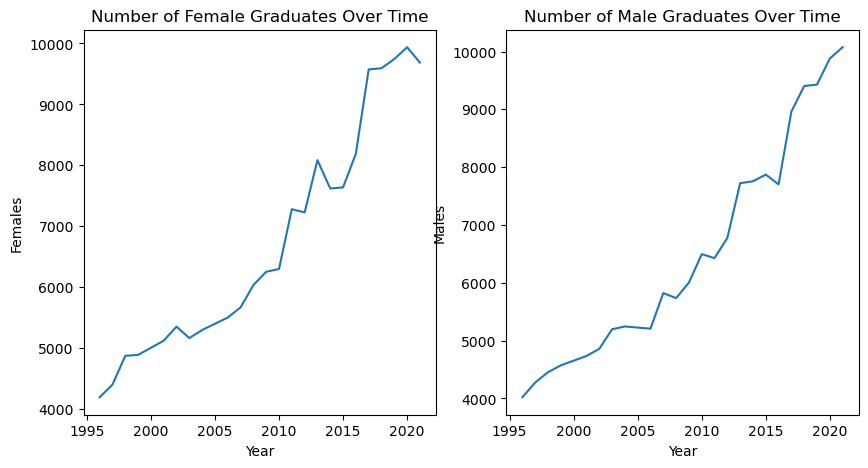

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first scatterplot in the first subplot
sns.lineplot(y=female_graduates, x=year, ax=axs[0])
axs[0].set_title('Number of Female Graduates Over Time')

# Plot the second scatterplot in the second subplot
sns.lineplot(y=male_graduates, x=year, ax=axs[1])
axs[1].set_title('Number of Male Graduates Over Time')
plt.show()


Coefficients:
[Female Graduates | Male Graduates]
 [ 0.64704701 13.97479288]


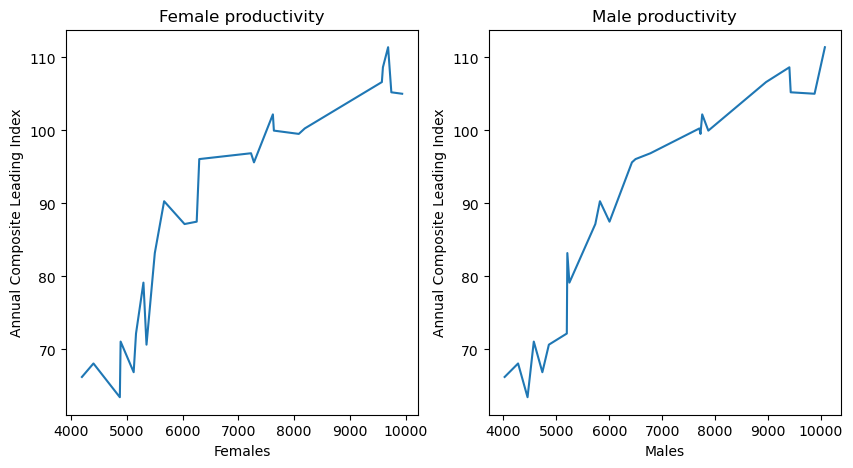

In [18]:
# Perform regression analysis
X = data[['Females', 'Males']]
y = productivity
X = (X - X.mean()) / X.std() # Normalise data
reg = LinearRegression().fit(X, y)
print("\nCoefficients:\n[Female Graduates | Male Graduates]\n", reg.coef_)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first scatterplot in the first subplot
sns.lineplot(y=productivity, x=female_graduates, ax=axs[0])
axs[0].set_title('Female productivity')

# Plot the second scatterplot in the second subplot
sns.lineplot(y=productivity, x=male_graduates, ax=axs[1])
axs[1].set_title('Male productivity')
plt.show()


R^2 score: 0.89
Root Mean Squared Error: 4.95

R^2 score: 0.78
Root Mean Squared Error: 6.99

R^2 score: 0.81
Root Mean Squared Error: 4.65

R^2 score: 0.83
Root Mean Squared Error: 5.52

R^2 score: 0.70
Root Mean Squared Error: 6.96

Goodness of Fit of Productivity against Graduate Profile:
Average Explained Variance (R^2) 	: 0.8
Average Root Mean Squared Error (RMSE) 	: 5.81


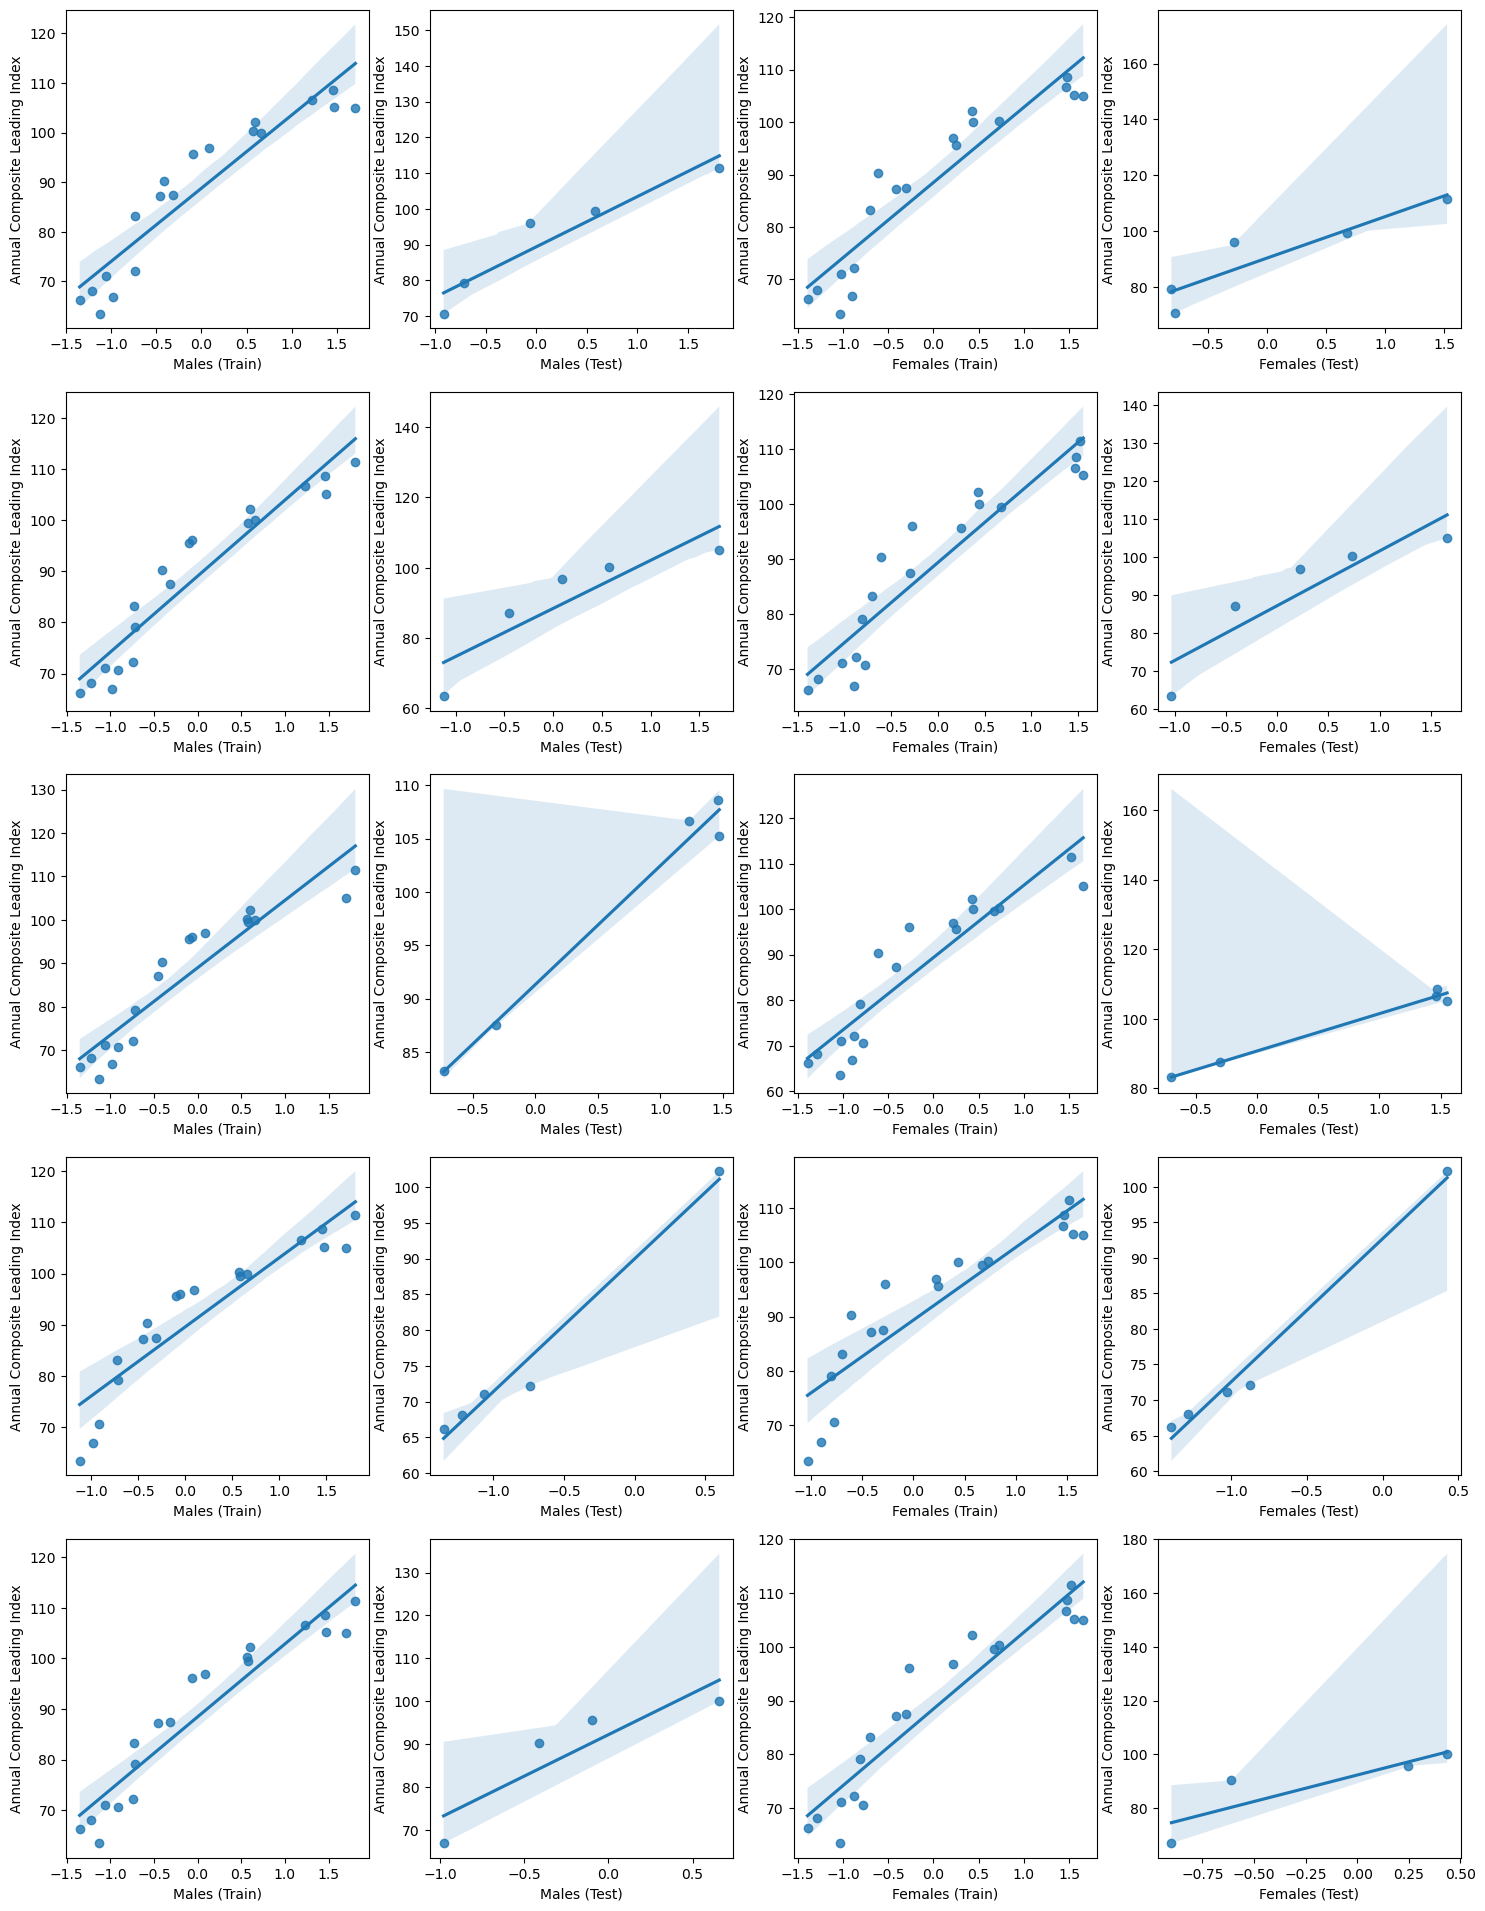

In [58]:
# Create empty lists to store RMSE and R2 scores for each fold
rmse_list = []
r2_list = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

f, axes = plt.subplots(5, 4, figsize=(18, 24))

count = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Perform regression analysis on the training set
    reg = LinearRegression()
    reg = reg.fit(X_train, y_train)

    # Predict productivity for the testing data
    y_pred = reg.predict(X_test)

    # Evaluate the model on the testing set
    r2 = reg.score(X_test, y_test)

    print(f"\nR^2 score: {r2:.2f}")

    # Calculate the mean squared error for this fold
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append RMSE and R2 scores to the lists
    rmse_list.append(rmse)
    r2_list.append(r2)

    # Calculate the average RMSE and R2 score
    rmse_ave = np.mean(rmse_list)
    score_ave = np.mean(r2_list)

    # Print the mean squared error for this fold
    print("Root Mean Squared Error:", rmse.round(2))
    
    
    sns.regplot(x=X_train['Males'], y=y_train, label='Train', ax = axes[count,0])
    sns.regplot(x=X_test['Males'], y=y_test, label='Test', ax = axes[count,1])
    sns.regplot(x=X_train['Females'], y=y_train, label='Train', ax = axes[count,2])
    sns.regplot(x=X_test['Females'], y=y_test, label='Test', ax = axes[count,3])
    
    axes[count,0].set_xlabel('Males (Train)')
    axes[count,1].set_xlabel('Males (Test)')
    axes[count,2].set_xlabel('Females (Train)')
    axes[count,3].set_xlabel('Females (Test)')
    count += 1



print("\nGoodness of Fit of Productivity against Graduate Profile:")
print("Average Explained Variance (R^2) \t:", score_ave.round(2))
print("Average Root Mean Squared Error (RMSE) \t:", rmse_ave.round(2))

### Evaluation: tbd

ValueError: Data must be 1-dimensional

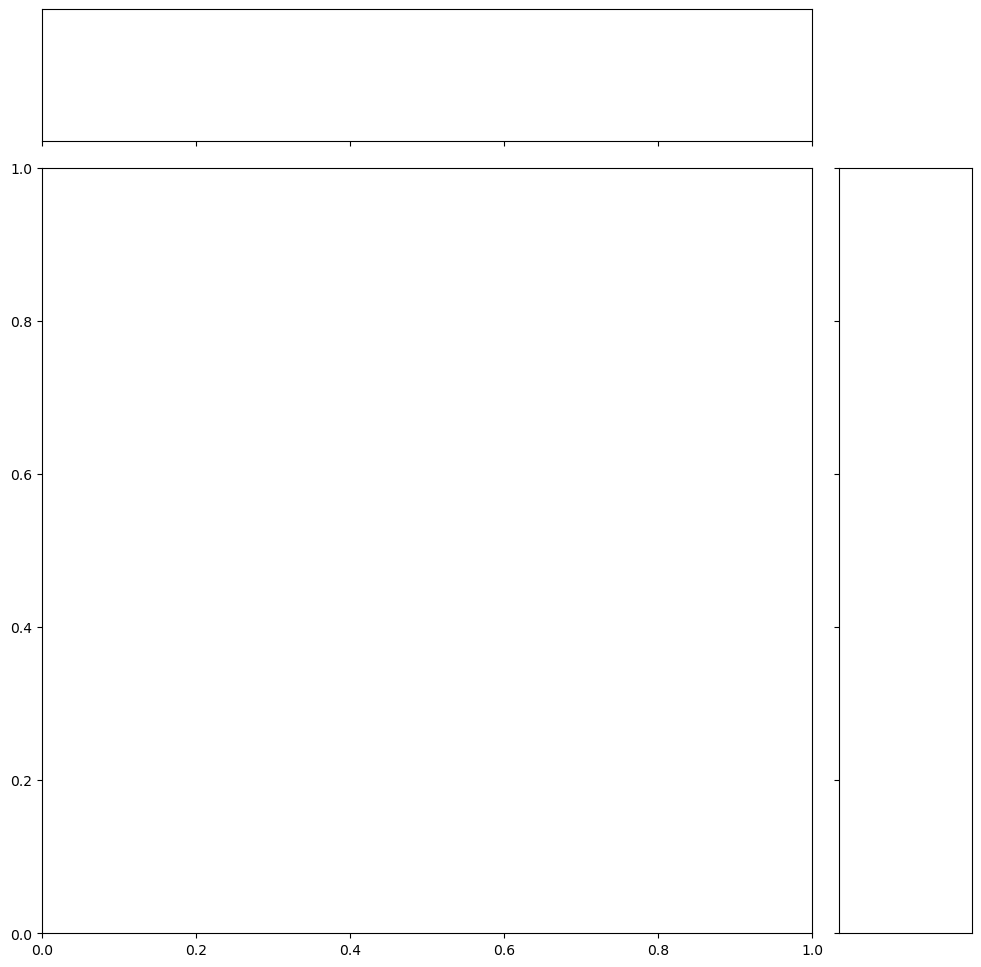

In [36]:
# Perform regression analysis
X = productivity
y = productivity
X = (X - X.mean()) / X.std() # Normalise data
reg = LinearRegression().fit(X, y)
print("\nCoefficients:\n[Female Graduates | Male Graduates]\n", reg.coef_)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first scatterplot in the first subplot
sns.lineplot(y=productivity, x=female_graduates, ax=axs[0])
axs[0].set_title('Female productivity')

# Plot the second scatterplot in the second subplot
sns.lineplot(y=productivity, x=male_graduates, ax=axs[1])
axs[1].set_title('Male productivity')
plt.show()

ValueError: DataFrame constructor not properly called!